# <a href="https://girafe.ai/" target="_blank" rel="noopener noreferrer"><img src="https://raw.githubusercontent.com/girafe-ai/ml-course/7096a5df4cada5ee651be1e3215c2f7fb8a7e0bf/logo_margin.svg" alt="girafe-ai logo" width="150px" align="left"></a> [ml-basic course](https://github.com/girafe-ai/ml-course) <a class="tocSkip">

# Lab assignment 01
## Data preprocessing, model training and evaluation

This lab assignment consists of several parts.

In this part you are supposed to work with tabular data: make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions in a chat, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

## 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [22]:
!pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [23]:
import ucimlrepo as uci
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [24]:
dataset = uci.fetch_ucirepo(id=149)

print(dataset.metadata.name, '\n')
print(dataset.metadata.abstract, '\n')
print(dataset.metadata.additional_info.summary, '\n')

Statlog (Vehicle Silhouettes) 

3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. 

The purpose is to classify a given silhouette as one of four types of vehicle, using  a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.  

HISTORY:

This data was originally gathered at the TI in 1986-87 by JP Siebert. It was partially financed by Barr and Stroud Ltd. The original purpose was to find a method of distinguishing 3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. Measures of shape features extracted from example silhouettes of objects to be discriminated were used to generate a classification rule tree by means of computer induction.

This object recognition strategy was successfully used to discriminate between silhouettes of model cars, vans and buses viewed from constrained elevati

In [25]:
data = dataset.data.features
target = dataset.data.targets

print(data.shape, target.shape)

(846, 18) (846, 1)


### 1.1 Data integrity

Check if data is valid. If it is not, remove invalid parts.


In [26]:
df = data.copy()
y = target.iloc[:, 0].copy()

df = df.replace([np.inf, -np.inf], np.nan)
mask = df.notna().all(axis=1) & y.notna()
df = df.loc[mask].reset_index(drop=True)
y = y.loc[mask].reset_index(drop=True)


### 1.2 Train and test sets

Split data into 2 groups using `sklearn`'s infrastructure.

Which size of test set to choose?

In [27]:
X = df.to_numpy()
y = y.to_numpy()

test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=42, stratify=y
)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

X_train_pd = pd.DataFrame(X_train)

X_train_pd.head(15)

X_train_pd.describe()

X_train_pd.info()








(676, 18) (676,) (169, 18) (169,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       676 non-null    float64
 1   1       676 non-null    float64
 2   2       676 non-null    float64
 3   3       676 non-null    float64
 4   4       676 non-null    float64
 5   5       676 non-null    float64
 6   6       676 non-null    float64
 7   7       676 non-null    float64
 8   8       676 non-null    float64
 9   9       676 non-null    float64
 10  10      676 non-null    float64
 11  11      676 non-null    float64
 12  12      676 non-null    float64
 13  13      676 non-null    float64
 14  14      676 non-null    float64
 15  15      676 non-null    float64
 16  16      676 non-null    float64
 17  17      676 non-null    float64
dtypes: float64(18)
memory usage: 95.2 KB


In [28]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(676, 18) (676,) (169, 18) (169,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [29]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,93.0,47.0,85.0,163.0,66.0,11.0,156.0,44.0,20.0,158.0,172.0,355.0,178.0,74.0,7.0,15.0,183.0,195.0
1,108.0,57.0,106.0,177.0,51.0,5.0,256.0,26.0,28.0,170.0,285.0,966.0,261.0,87.0,11.0,2.0,182.0,181.0
2,109.0,48.0,107.0,215.0,62.0,10.0,205.0,32.0,23.0,158.0,222.0,624.0,168.0,65.0,9.0,32.0,195.0,206.0
3,89.0,41.0,84.0,141.0,58.0,9.0,149.0,45.0,19.0,145.0,172.0,330.0,162.0,72.0,4.0,18.0,188.0,200.0
4,97.0,41.0,62.0,133.0,56.0,7.0,130.0,52.0,18.0,143.0,158.0,247.0,157.0,78.0,5.0,7.0,184.0,186.0
5,95.0,36.0,73.0,191.0,73.0,6.0,156.0,41.0,19.0,126.0,184.0,374.0,124.0,71.0,2.0,19.0,199.0,204.0
6,87.0,44.0,98.0,211.0,70.0,10.0,189.0,35.0,22.0,141.0,214.0,535.0,178.0,71.0,2.0,21.0,187.0,194.0
7,109.0,55.0,96.0,191.0,57.0,6.0,241.0,28.0,26.0,170.0,267.0,857.0,242.0,85.0,8.0,9.0,184.0,184.0
8,83.0,42.0,71.0,152.0,64.0,7.0,149.0,45.0,19.0,142.0,172.0,331.0,158.0,74.0,2.0,2.0,184.0,190.0
9,87.0,41.0,76.0,165.0,67.0,7.0,148.0,45.0,19.0,140.0,171.0,327.0,152.0,72.0,7.0,13.0,188.0,195.0


Methods `describe` and `info` deliver some useful information.

In [30]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,93.353550,44.788462,81.789941,168.440828,61.741124,8.693787,168.115385,41.106509,20.526627,147.902367,188.020710,435.831361,174.437870,72.576923,6.322485,12.321006,188.809172,195.534024
std,8.214937,6.119156,15.678160,33.935814,8.345653,5.024623,32.876717,7.760520,2.568908,14.480411,30.910904,174.266015,32.083742,7.707140,4.872857,8.982893,6.168064,7.425304
min,73.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,33.000000,19.000000,137.000000,167.000000,317.000000,150.000000,68.000000,2.000000,5.000000,184.000000,190.750000
50%,92.000000,44.000000,79.000000,166.000000,61.000000,8.000000,156.000000,43.000000,19.000000,146.000000,177.500000,360.500000,173.000000,72.000000,6.000000,11.000000,188.000000,197.000000
75%,99.000000,49.000000,96.500000,194.000000,65.000000,10.000000,197.000000,46.000000,23.000000,159.000000,217.000000,583.250000,198.000000,76.000000,9.000000,18.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,186.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [31]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       676 non-null    float64
 1   1       676 non-null    float64
 2   2       676 non-null    float64
 3   3       676 non-null    float64
 4   4       676 non-null    float64
 5   5       676 non-null    float64
 6   6       676 non-null    float64
 7   7       676 non-null    float64
 8   8       676 non-null    float64
 9   9       676 non-null    float64
 10  10      676 non-null    float64
 11  11      676 non-null    float64
 12  12      676 non-null    float64
 13  13      676 non-null    float64
 14  14      676 non-null    float64
 15  15      676 non-null    float64
 16  16      676 non-null    float64
 17  17      676 non-null    float64
dtypes: float64(18)
memory usage: 95.2 KB


## 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

### 2.0. Data preprocessing

Apply transformations to the dataset (if necessary).

Briefly explain the transformations

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)


In [33]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)
y_test_enc = le.transform(y_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


### 2.1. Basic logistic regression

* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression:\
`multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:124

{'clf__C': 10, 'clf__penalty': 'l1'}
accuracy 0.8402366863905325
f1_macro 0.835153974198918


/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


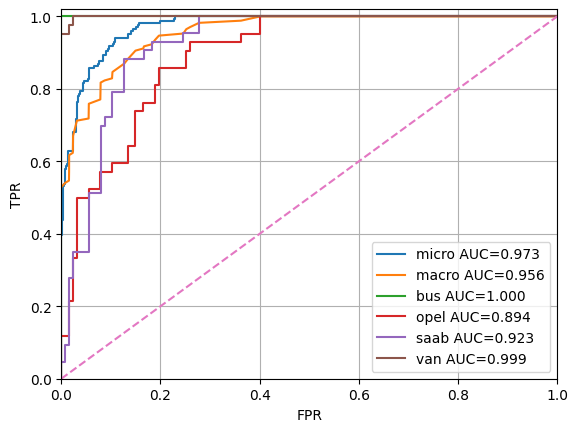

In [34]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(
        multi_class="multinomial",
        solver="saga",
        tol=1e-3,
        max_iter=500,
        n_jobs=-1
    ))
])

param_grid = [
    {"clf__penalty": ["l2"], "clf__C": [0.01, 0.1, 1, 10]},
    {"clf__penalty": ["l1"], "clf__C": [0.01, 0.1, 1, 10]},
    {"clf__penalty": ["elasticnet"], "clf__C": [0.01, 0.1, 1, 10], "clf__l1_ratio": [0.2, 0.5, 0.8]},
]

grid = GridSearchCV(pipe, param_grid, scoring="f1_macro", cv=5, n_jobs=-1)
grid.fit(X_train, y_train_enc)

best_lr = grid.best_estimator_
y_pred = best_lr.predict(X_test)
y_proba = best_lr.predict_proba(X_test)

print(grid.best_params_)
print("accuracy", accuracy_score(y_test_enc, y_pred))
print("f1_macro", f1_score(y_test_enc, y_pred, average="macro"))

n_classes = len(le.classes_)
y_test_bin = label_binarize(y_test_enc, classes=np.arange(n_classes))

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label=f"micro AUC={roc_auc['micro']:.3f}")
plt.plot(fpr["macro"], tpr["macro"], label=f"macro AUC={roc_auc['macro']:.3f}")

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"{le.classes_[i]} AUC={roc_auc[i]:.3f}")

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlim(0, 1)
plt.ylim(0, 1.02)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid(True)
plt.legend()
plt.show()


In [35]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead

! pip install scikit-plot

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


### 2.2. PCA: explained variance plot

Apply the PCA to the train part of the data.

Build the explaided variance plot.

In [36]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

imp = SimpleImputer(strategy="median")

X_train_imp = imp.fit_transform(X_train)
X_val_imp = imp.transform(X_val)
X_test_imp = imp.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imp)
X_val_scaled = scaler.transform(X_val_imp)
X_test_scaled = scaler.transform(X_test_imp)

X_train_scaled = np.nan_to_num(X_train_scaled, nan=0.0, posinf=0.0, neginf=0.0)
X_val_scaled = np.nan_to_num(X_val_scaled, nan=0.0, posinf=0.0, neginf=0.0)
X_test_scaled = np.nan_to_num(X_test_scaled, nan=0.0, posinf=0.0, neginf=0.0)


In [37]:
import numpy as np
from sklearn.decomposition import PCA

pca0 = PCA()
pca0.fit(X_train_scaled)

cum = np.cumsum(pca0.explained_variance_ratio_)
n_components = int(np.argmax(cum >= 0.95) + 1)

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("n_components =", n_components)
print("explained_variance_sum =", pca.explained_variance_ratio_.sum())


n_components = 7
explained_variance_sum = 0.9628309490922612


/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/Users/vadim/Library/Python/3.9/lib/python/site-packages/skl

### 2.3. PCA trasformation

Select the appropriate number of components.

Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train`, `val` and `test` parts.*

In [38]:
n_components = int(np.argmax(cum >= 0.95) + 1)

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("n_components =", n_components)
print("explained_variance_sum =", pca.explained_variance_ratio_.sum())


n_components = 7
explained_variance_sum = 0.9628309490922612


/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed =

Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.

### 2.4. Logistic regression on PCA-preprocessed data

* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.
* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression:\
`multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

lr_pca = LogisticRegression(
    multi_class="multinomial",
    solver="saga",
    tol=1e-3,
    max_iter=500,
    n_jobs=-1
)

param_grid_pca = [
    {"C": [0.01, 0.1, 1, 10], "penalty": ["l2"]},
    {"C": [0.01, 0.1, 1, 10], "penalty": ["l1"]},
    {"C": [0.01, 0.1, 1, 10], "penalty": ["elasticnet"], "l1_ratio": [0.2, 0.5, 0.8]},
]

grid_pca = GridSearchCV(lr_pca, param_grid_pca, scoring="f1_macro", cv=5, n_jobs=-1)
grid_pca.fit(X_train_pca, y_train_enc)

best_lr_pca = grid_pca.best_estimator_
y_pred_pca = best_lr_pca.predict(X_test_pca)
y_proba_pca = best_lr_pca.predict_proba(X_test_pca)

print(grid_pca.best_params_)
print("accuracy", accuracy_score(y_test_enc, y_pred_pca))
print("f1_macro", f1_score(y_test_enc, y_pred_pca, average="macro"))


/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:124

{'C': 1, 'l1_ratio': 0.2, 'penalty': 'elasticnet'}
accuracy 0.6331360946745562
f1_macro 0.6295188580799046


/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


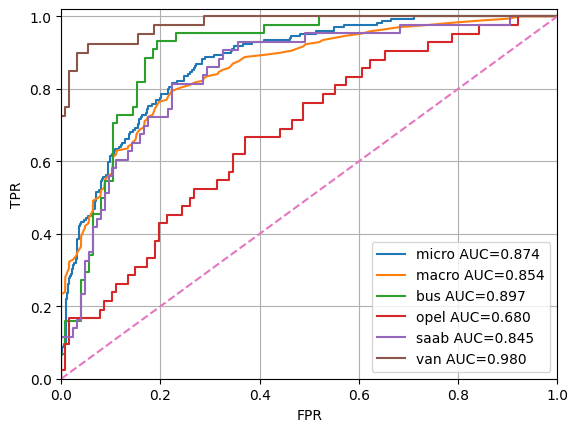

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

n_classes = len(le.classes_)
y_test_bin = label_binarize(y_test_enc, classes=np.arange(n_classes))

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba_pca[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_proba_pca.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label=f"micro AUC={roc_auc['micro']:.3f}")
plt.plot(fpr["macro"], tpr["macro"], label=f"macro AUC={roc_auc['macro']:.3f}")

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"{le.classes_[i]} AUC={roc_auc[i]:.3f}")

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlim(0, 1)
plt.ylim(0, 1.02)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid(True)
plt.legend()
plt.show()


### 2.5. Decision tree

* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

tree = DecisionTreeClassifier(random_state=42)

grid_tree = GridSearchCV(
    tree,
    {"max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]},
    scoring="f1_macro",
    cv=5,
    n_jobs=-1
)

grid_tree.fit(X_train, y_train_enc)

best_tree = grid_tree.best_estimator_
y_pred_tree = best_tree.predict(X_test)

print(grid_tree.best_params_)
print("accuracy", accuracy_score(y_test_enc, y_pred_tree))
print("f1_macro", f1_score(y_test_enc, y_pred_tree, average="macro"))


{'max_depth': 8}
accuracy 0.650887573964497
f1_macro 0.6426939601559599


### 2.6. Bagging

Here starts the ensembling part. You need to use [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ with step 5.

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: Runtime

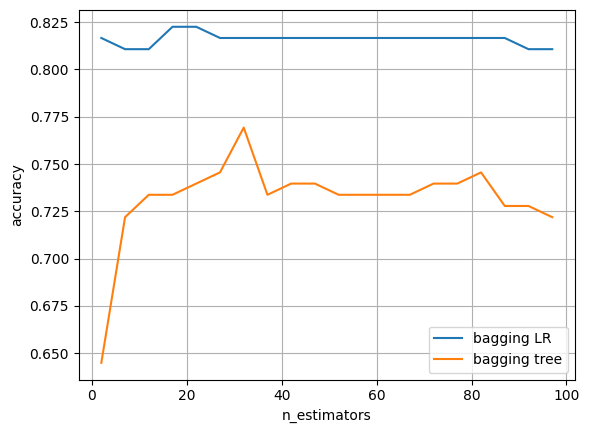

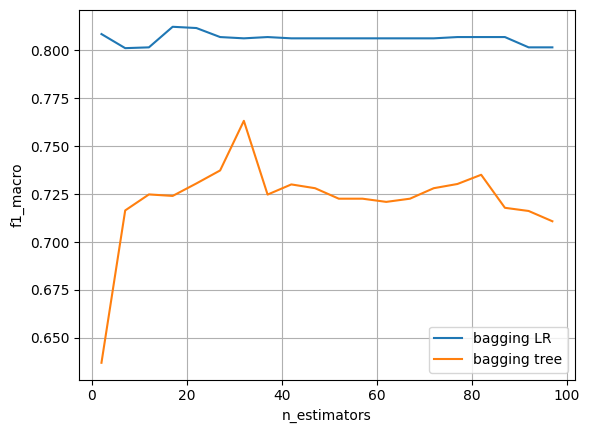

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

ns = list(range(2, 101, 5))

acc_lr = []
f1_lr = []
acc_tree = []
f1_tree = []

base_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(
        multi_class="multinomial",
        solver="saga",
        tol=1e-3,
        max_iter=500,
        n_jobs=-1
    ))
])

base_tree = DecisionTreeClassifier(max_depth=best_tree.get_params()["max_depth"], random_state=42)

for n in ns:
    try:
        bag_lr = BaggingClassifier(estimator=base_lr, n_estimators=n, random_state=42, n_jobs=-1)
    except TypeError:
        bag_lr = BaggingClassifier(base_estimator=base_lr, n_estimators=n, random_state=42, n_jobs=-1)

    bag_lr.fit(X_train, y_train_enc)
    p = bag_lr.predict(X_test)
    acc_lr.append(accuracy_score(y_test_enc, p))
    f1_lr.append(f1_score(y_test_enc, p, average="macro"))

    try:
        bag_tree = BaggingClassifier(estimator=base_tree, n_estimators=n, random_state=42, n_jobs=-1)
    except TypeError:
        bag_tree = BaggingClassifier(base_estimator=base_tree, n_estimators=n, random_state=42, n_jobs=-1)

    bag_tree.fit(X_train, y_train_enc)
    p = bag_tree.predict(X_test)
    acc_tree.append(accuracy_score(y_test_enc, p))
    f1_tree.append(f1_score(y_test_enc, p, average="macro"))

plt.figure()
plt.plot(ns, acc_lr, label="bagging LR")
plt.plot(ns, acc_tree, label="bagging tree")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.plot(ns, f1_lr, label="bagging LR")
plt.plot(ns, f1_tree, label="bagging tree")
plt.xlabel("n_estimators")
plt.ylabel("f1_macro")
plt.grid(True)
plt.legend()
plt.show()


### 2.7. Random Forest

Now we will work with the [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

* Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

best_n_estimators 12


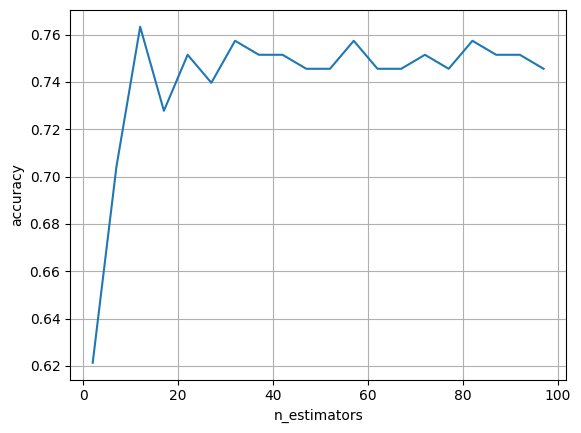

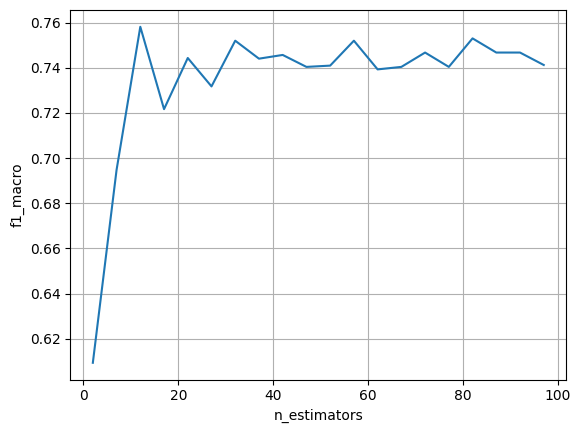

In [43]:
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

ns_rf = list(range(2, 101, 5))

acc_rf = []
f1_rf = []

for n in ns_rf:
    rf = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train_enc)
    p = rf.predict(X_test)
    acc_rf.append(accuracy_score(y_test_enc, p))
    f1_rf.append(f1_score(y_test_enc, p, average="macro"))

best_rf_n = ns_rf[int(np.argmax(f1_rf))]
best_rf = RandomForestClassifier(n_estimators=best_rf_n, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train_enc)

print("best_n_estimators", best_rf_n)

plt.figure()
plt.plot(ns_rf, acc_rf)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(ns_rf, f1_rf)
plt.xlabel("n_estimators")
plt.ylabel("f1_macro")
plt.grid(True)
plt.show()


### 2.8. Learning curve

Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected. First train it on first part, then on first and second parts combined (so the train size in increased by 2 times), first 3 parts and so on.

* You may use `sklearn`'s [readymade function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html). But note that you need to adjust parameters of this function appropriately.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score vs dataset size).

* Analyse the final plot. Can you make any conlusions using it?

/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/vadim/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: Run

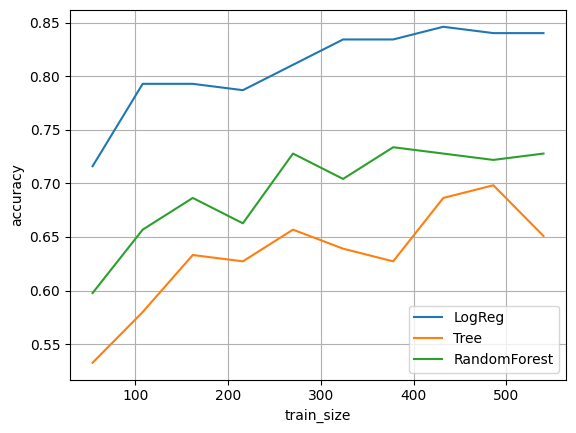

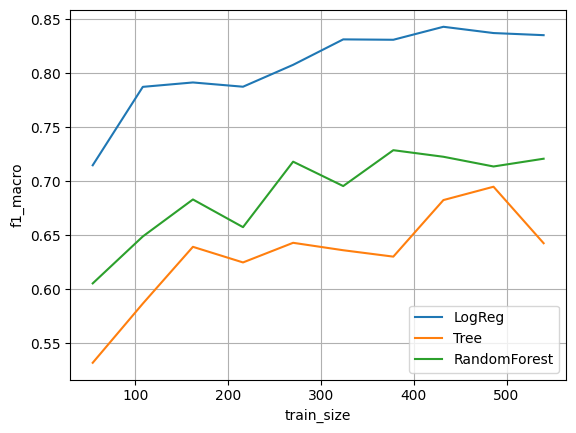

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

cv10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
folds = list(cv10.split(X_train, y_train_enc))

idx_parts = [test_idx for (_, test_idx) in folds]

lr_best = LogisticRegression(
    multi_class="multinomial",
    solver="saga",
    tol=1e-3,
    max_iter=500,
    n_jobs=-1,
    **{k.replace("clf__", ""): v for k, v in grid.best_params_.items()}
)

lr_model = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", lr_best)
])

tree_model = DecisionTreeClassifier(
    random_state=42,
    **grid_tree.best_params_
)

rf_model = RandomForestClassifier(
    n_estimators=best_rf_n,
    random_state=42,
    n_jobs=-1
)

xs = []
acc_lr, f1_lr = [], []
acc_tree, f1_tree = [], []
acc_rf, f1_rf = [], []

cur_idx = np.array([], dtype=int)

for i in range(10):
    cur_idx = np.concatenate([cur_idx, idx_parts[i]])
    X_part = X_train[cur_idx]
    y_part = y_train_enc[cur_idx]

    xs.append(len(cur_idx))

    lr_model.fit(X_part, y_part)
    p = lr_model.predict(X_test)
    acc_lr.append(accuracy_score(y_test_enc, p))
    f1_lr.append(f1_score(y_test_enc, p, average="macro"))

    tree_model.fit(X_part, y_part)
    p = tree_model.predict(X_test)
    acc_tree.append(accuracy_score(y_test_enc, p))
    f1_tree.append(f1_score(y_test_enc, p, average="macro"))

    rf_model.fit(X_part, y_part)
    p = rf_model.predict(X_test)
    acc_rf.append(accuracy_score(y_test_enc, p))
    f1_rf.append(f1_score(y_test_enc, p, average="macro"))

plt.figure()
plt.plot(xs, acc_lr, label="LogReg")
plt.plot(xs, acc_tree, label="Tree")
plt.plot(xs, acc_rf, label="RandomForest")
plt.xlabel("train_size")
plt.ylabel("accuracy")
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.plot(xs, f1_lr, label="LogReg")
plt.plot(xs, f1_tree, label="Tree")
plt.plot(xs, f1_rf, label="RandomForest")
plt.xlabel("train_size")
plt.ylabel("f1_macro")
plt.grid(True)
plt.legend()
plt.show()


### 2.9. Boosting

Apply [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) to this problem.

Find optimal hyperparameters using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) or RandomizedSearchCV.

Hyperparameters to consider:
* depth of each tree
* number of decision trees
* learning rate

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

gb = GradientBoostingClassifier(random_state=42)

param_grid_gb = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [1, 2, 3],
}

grid_gb = GridSearchCV(gb, param_grid_gb, scoring="f1_macro", cv=5, n_jobs=-1)
grid_gb.fit(X_train, y_train_enc)

best_gb = grid_gb.best_estimator_
p = best_gb.predict(X_test)

print(grid_gb.best_params_)
print("accuracy", accuracy_score(y_test_enc, p))
print("f1_macro", f1_score(y_test_enc, p, average="macro"))


{'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 100}
accuracy 0.7692307692307693
f1_macro 0.7681379080612925


Случайный лес обычно показывает лучшие значения accuracy и f1 и быстрее выходит на хороший уровень, потому что усредняет много деревьев и менее чувствителен к шуму.